In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dataframe_image as dfi

In [2]:
df = pd.read_csv('../data/preprocessed_lubusz.csv', index_col=0)

df.head()

,station_code,station_name,year,month,day,24h_precipitation_mm,SMDB_status,precip_type,snow_cover_cm,river,lat,lon,altitude
0,251150110,ŻAGAŃ,1991,1,1,1.9,Normal,Water,0,Bóbr,51.649722,15.293611,96
1,251150110,ŻAGAŃ,1991,1,2,2.5,Normal,Water,0,Bóbr,51.649722,15.293611,96
2,251150110,ŻAGAŃ,1991,1,3,1.1,Normal,Water,0,Bóbr,51.649722,15.293611,96
3,251150110,ŻAGAŃ,1991,1,4,3.2,Normal,Water,0,Bóbr,51.649722,15.293611,96
4,251150110,ŻAGAŃ,1991,1,5,1.3,Normal,Water,0,Bóbr,51.649722,15.293611,96


## Data types

In [3]:
df_t = df.copy()
df_t.dtypes

#int in snow cover and altitude might be as well floats

station_code              int64
station_name             object
year                      int64
month                     int64
day                       int64
24h_precipitation_mm    float64
SMDB_status              object
precip_type              object
snow_cover_cm             int64
river                    object
lat                     float64
lon                     float64
altitude                  int64
dtype: object

In [4]:
# correcting dtaa typ - delete or not? 
df_t['date'] = pd.to_datetime(df_t[['year', 'month', 'day']])
df_t.drop(['year', 'month', 'day'], axis=1, inplace=True)
df_t.set_index('date', inplace=True)

In [5]:
# correcting ints to floats where necessary
df_t['altitude'] = df_t['altitude'].astype(float)
df_t['snow_cover_cm'] = df_t['snow_cover_cm'].astype(float)

In [24]:
desc = df_t.describe()
dfi.export(desc, 'desc.png')

In [25]:
c = df_t.count()
dfi.export(c, 'c.png')

IndexError: tuple index out of range

In [8]:
df_t.nunique()

station_code              7
station_name              7
24h_precipitation_mm    380
SMDB_status               3
precip_type               3
snow_cover_cm            28
river                     6
lat                       7
lon                       7
altitude                  7
dtype: int64

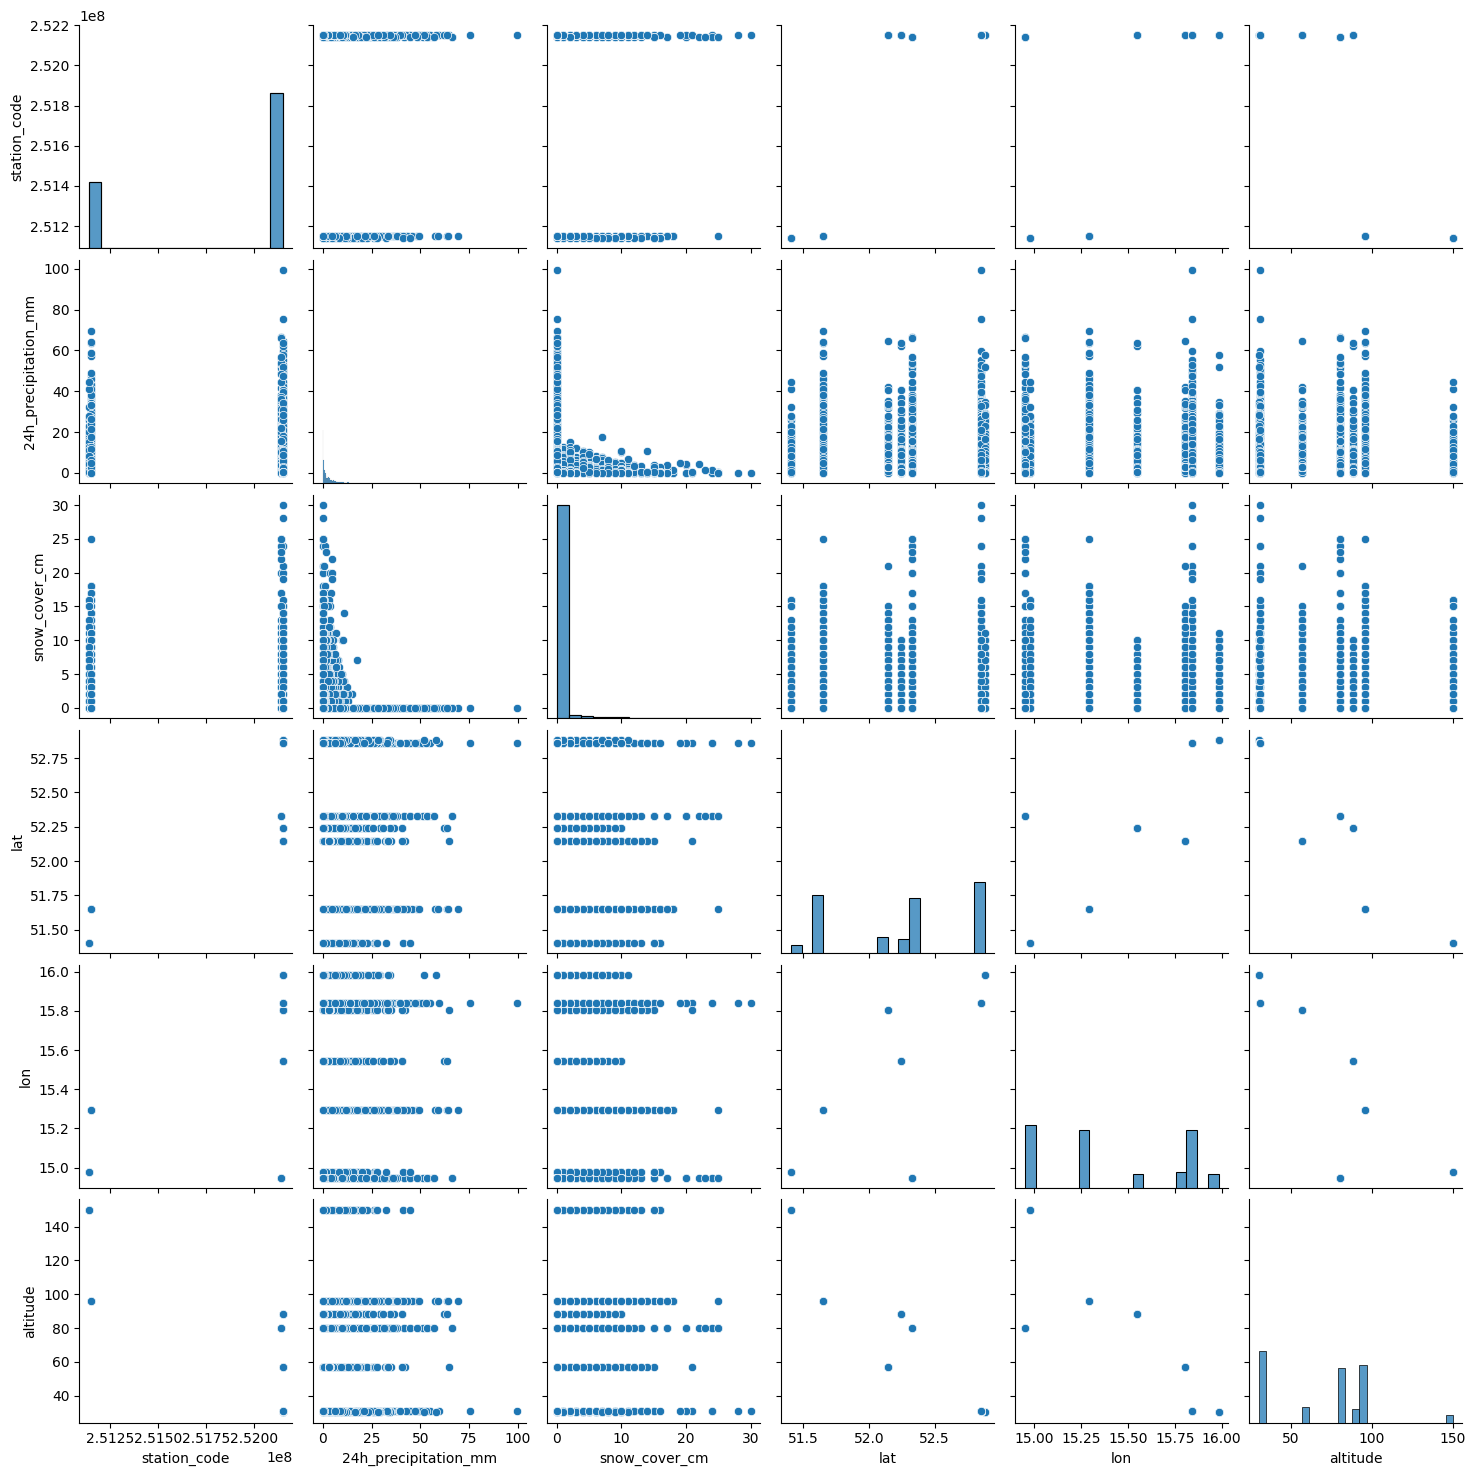

In [9]:
sns.pairplot(df_t)

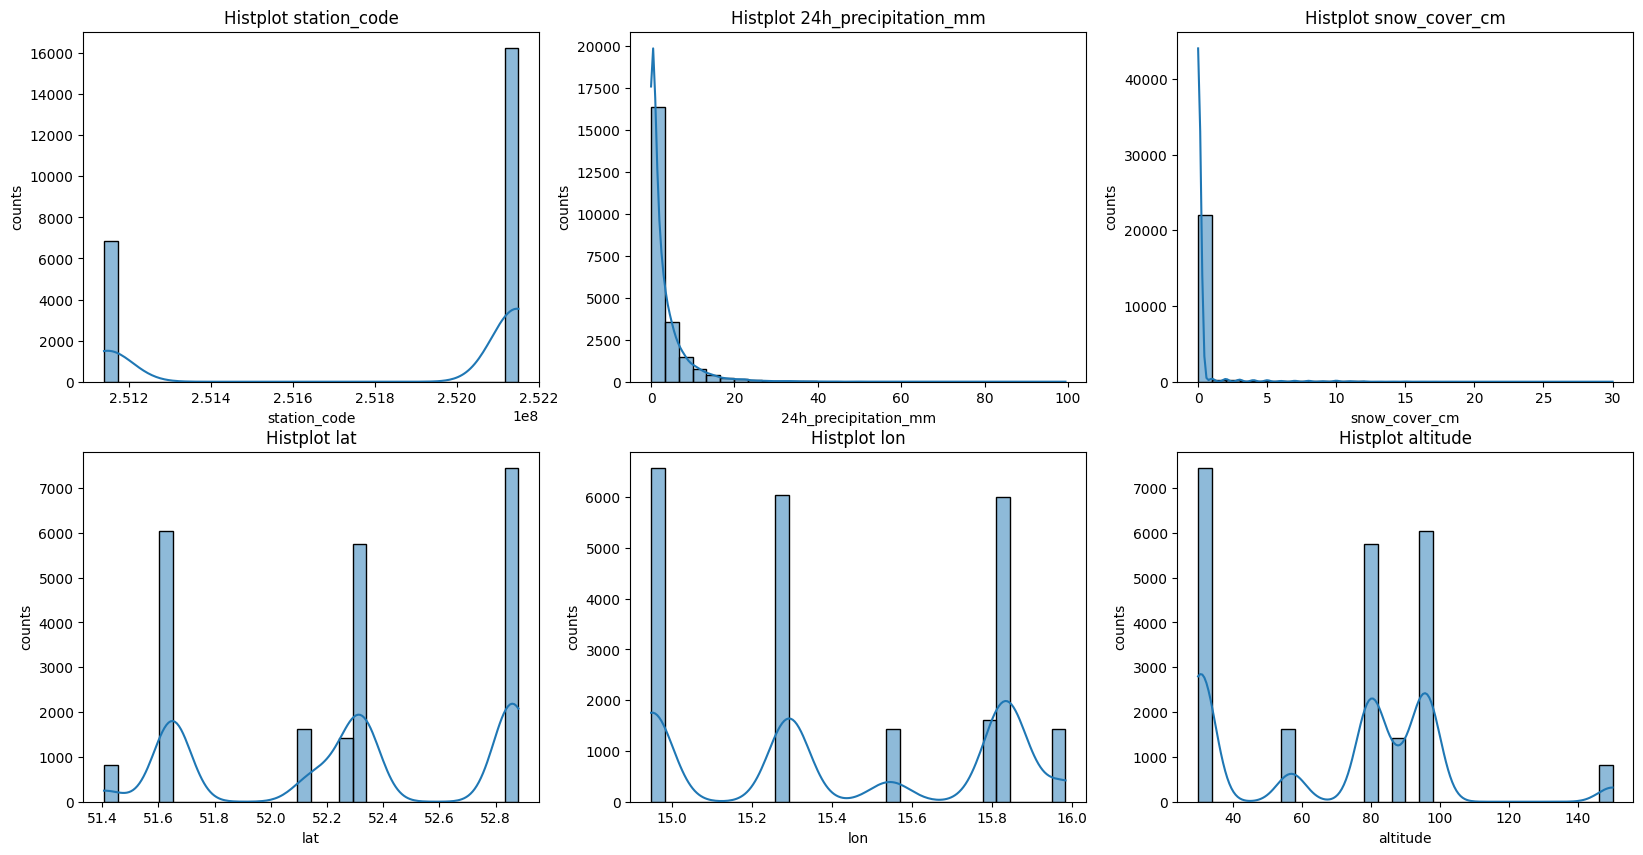

In [10]:
numeric_columns = df_t.select_dtypes(include=['float64', 'int64'])

cols = numeric_columns.columns.to_list()
fig, ax = plt.subplots(2,3,figsize=(20,10))
ax = ax.flatten()

for i in range(len(cols)):
    sns.histplot(df_t[cols[i]], ax=ax[i], bins=30, kde=True)
    ax[i].set(title=f'Histplot {cols[i]}', ylabel='counts')

plt.show()

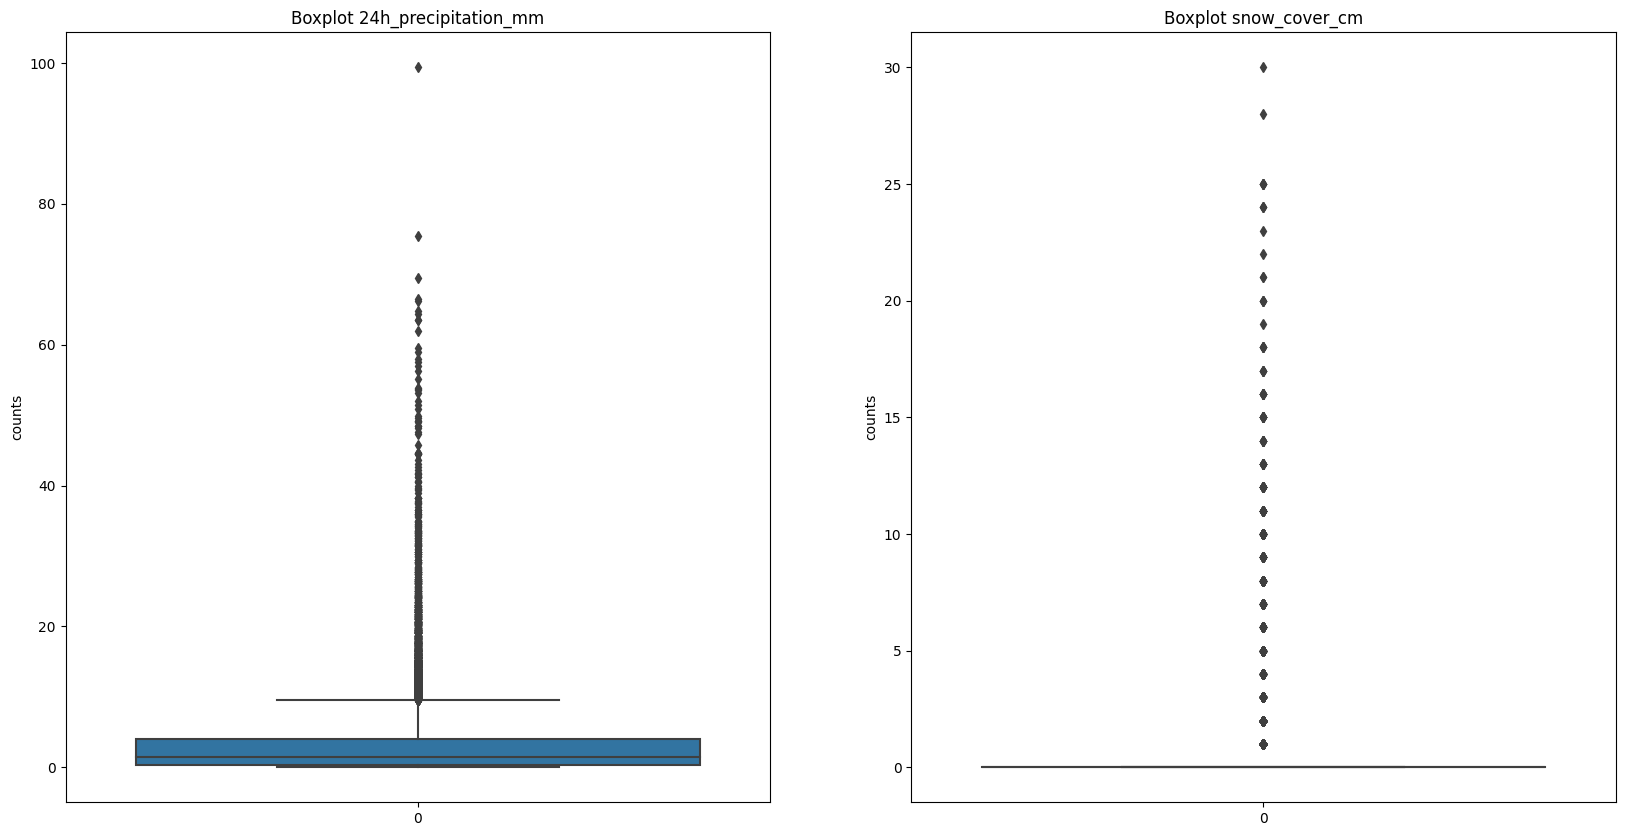

In [11]:
cols = ['24h_precipitation_mm', 'snow_cover_cm']
fig, ax = plt.subplots(1,2,figsize=(20,10))
ax = ax.flatten()

for i in range(len(cols)):
    sns.boxplot(df_t[cols[i]], ax=ax[i])
    ax[i].set(title=f'Boxplot {cols[i]}', ylabel='counts')

plt.show()

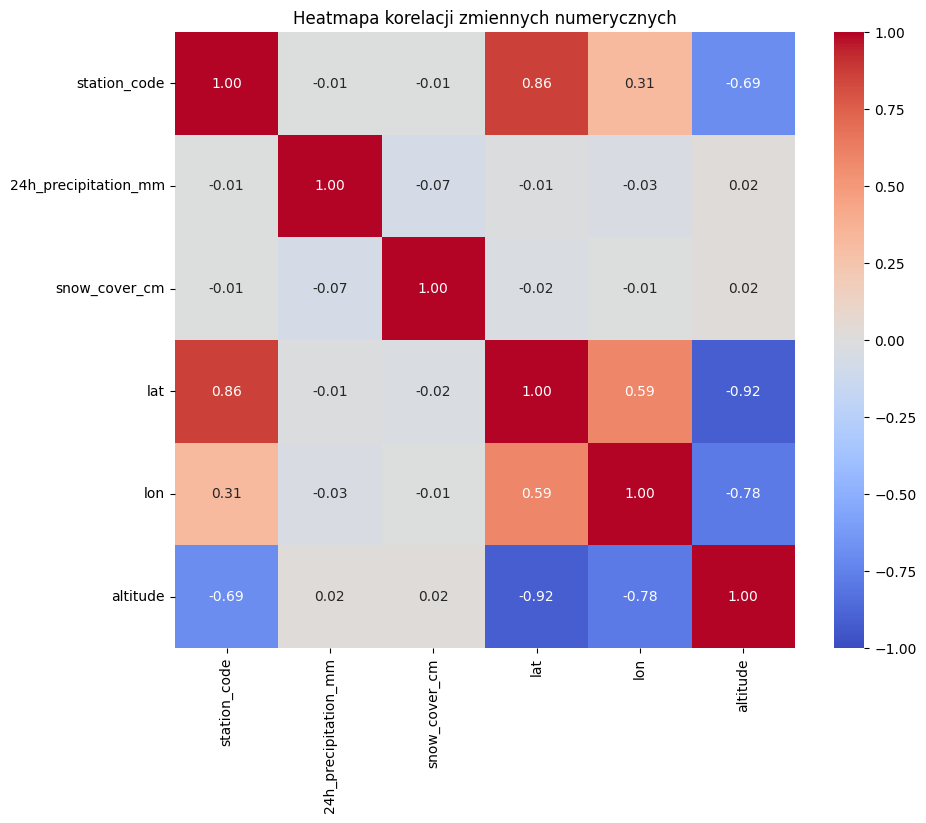

In [12]:
correlation = numeric_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, annot=True)
plt.title('Heatmapa korelacji zmiennych numerycznych')
plt.show()

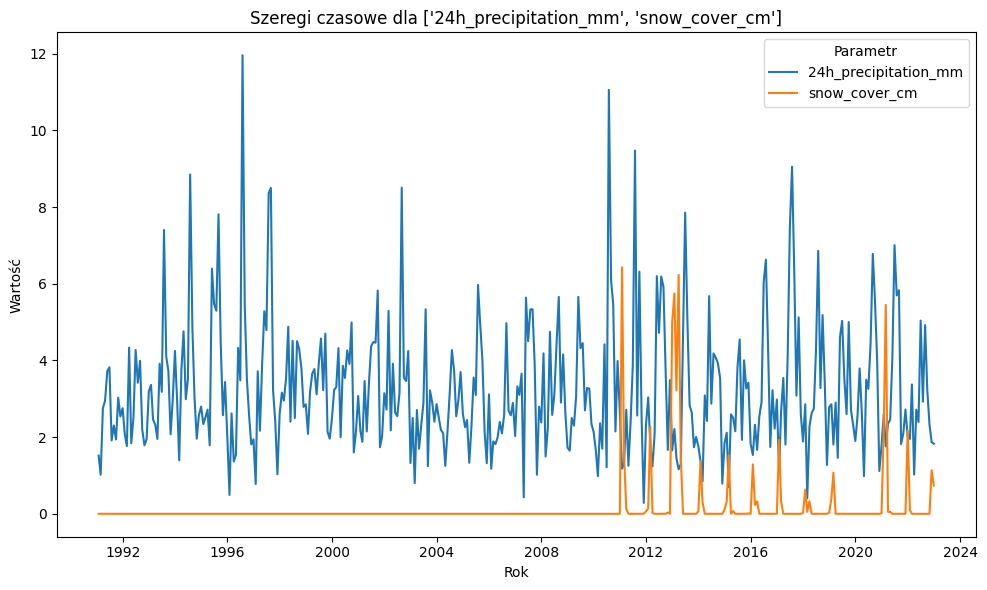

In [13]:
df_plot = df_t.copy()
df_plot = df_plot[cols].resample('M').mean()

plt.figure(figsize=(10, 6))
for c in cols:
    sns.lineplot(data=df_plot, x='date', y=c, label=c, errorbar=None)

plt.title(f'Szeregi czasowe dla {cols}')
plt.xlabel('Rok')
plt.ylabel('Wartość')
plt.legend(title='Parametr')
plt.tight_layout()
plt.show()

## Na poziomie stacji

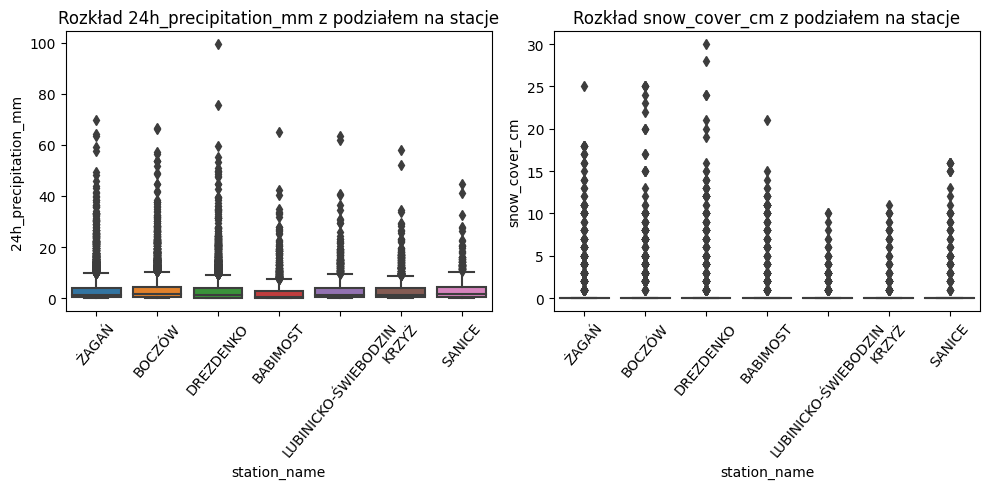

In [14]:
n_stations = len(df_t['station_name'].unique())
x_ticks = [x for x in df_t["station_name"].unique()]

fig, ax = plt.subplots(1, 2, figsize=(10,5))

for i, column in enumerate(cols):   
    sns.boxplot(data=df_t, y=column, x='station_name', ax=ax[i])
    ax[i].set_title(f'Rozkład {column} z podziałem na stacje')
    ax[i].set_xticklabels(x_ticks, rotation = 50)

plt.tight_layout()
plt.show()

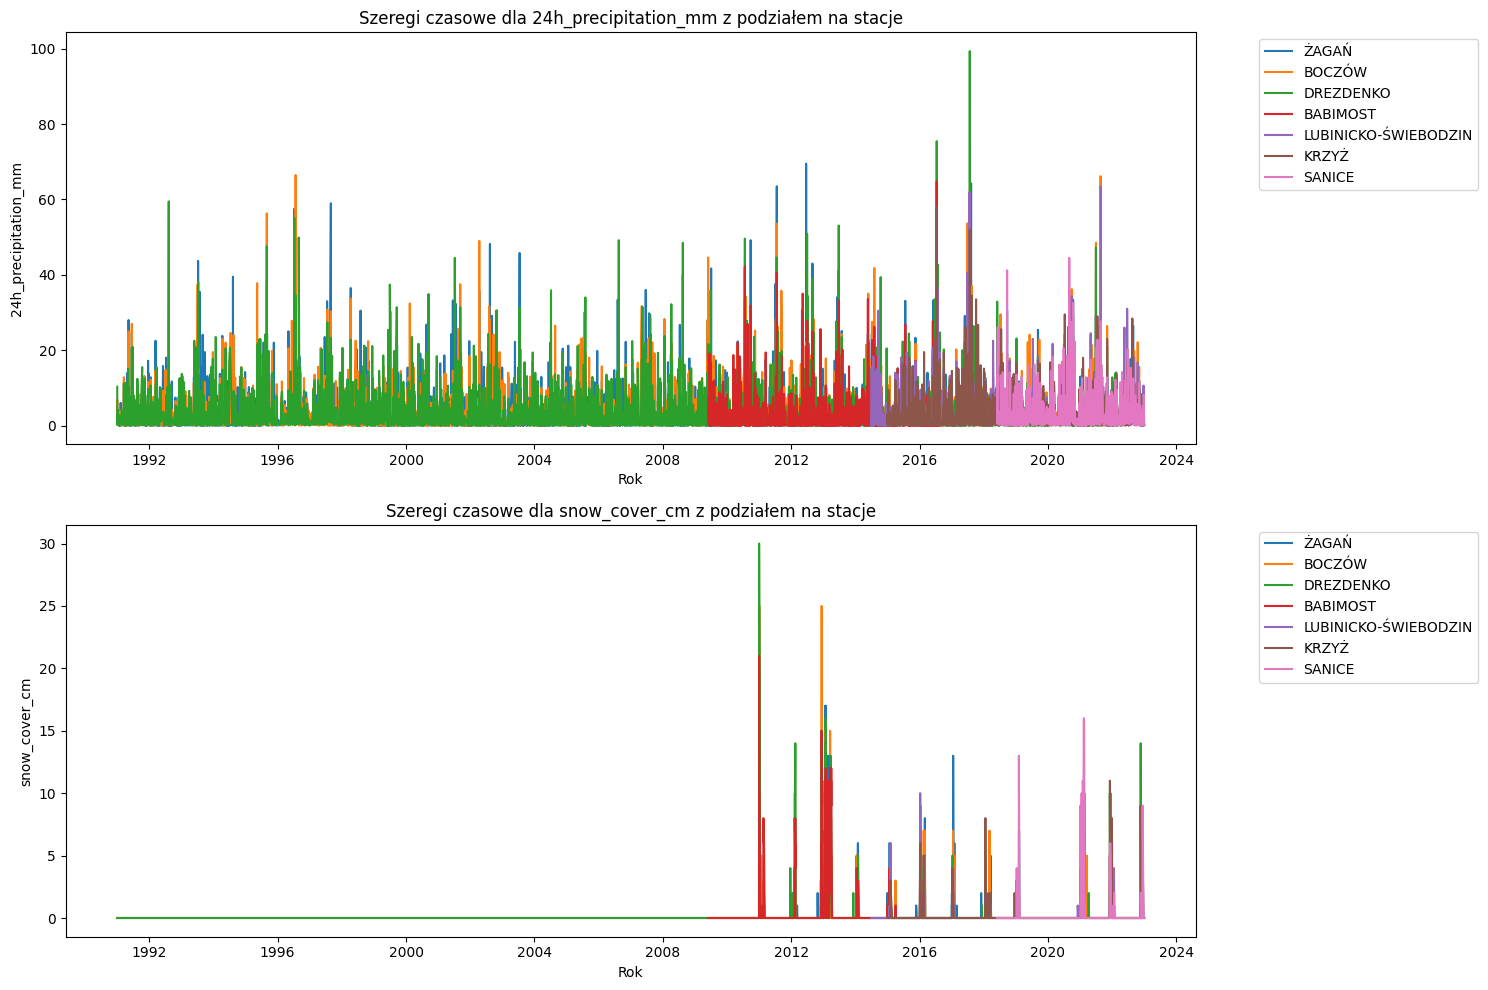

In [15]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10))
for i, column in enumerate(cols):
    sns.lineplot(data=df_t, x='date', y=column,  ax=ax[i], errorbar=None, hue='station_name')
    ax[i].set_title(f'Szeregi czasowe dla {column} z podziałem na stacje')
    ax[i].set_ylabel(column)
    ax[i].set_xlabel('Rok')
    ax[i].legend(bbox_to_anchor=(1.05, 1), loc='upper left')


plt.tight_layout()
plt.show()

## Przy rzekach

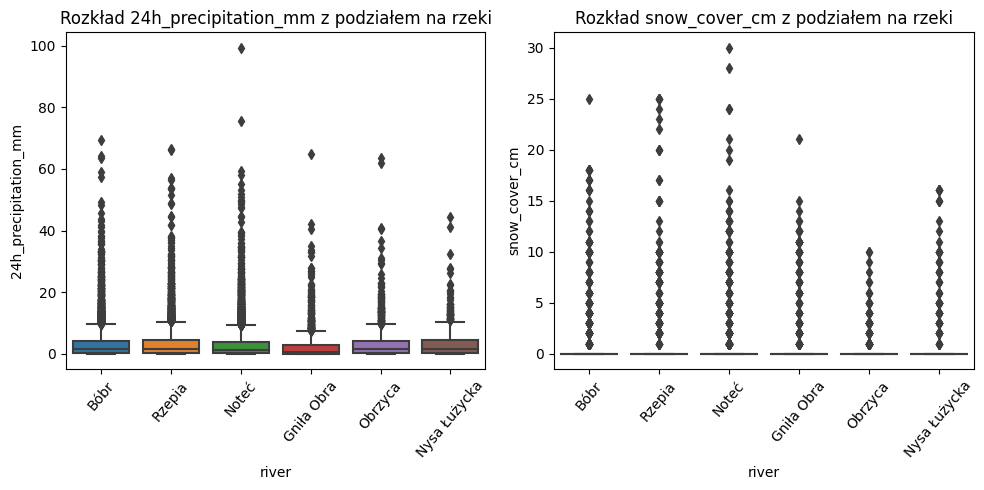

In [16]:
n_rivers = len(df_t['river'].unique())
x_ticks = [x for x in df_t["river"].unique()]

fig, ax = plt.subplots(1, 2, figsize=(10,5))

for i, column in enumerate(cols):   
    sns.boxplot(data=df_t, y=column, x='river', ax=ax[i])
    ax[i].set_title(f'Rozkład {column} z podziałem na rzeki')
    ax[i].set_xticklabels(x_ticks, rotation = 50)

plt.tight_layout()
plt.show()

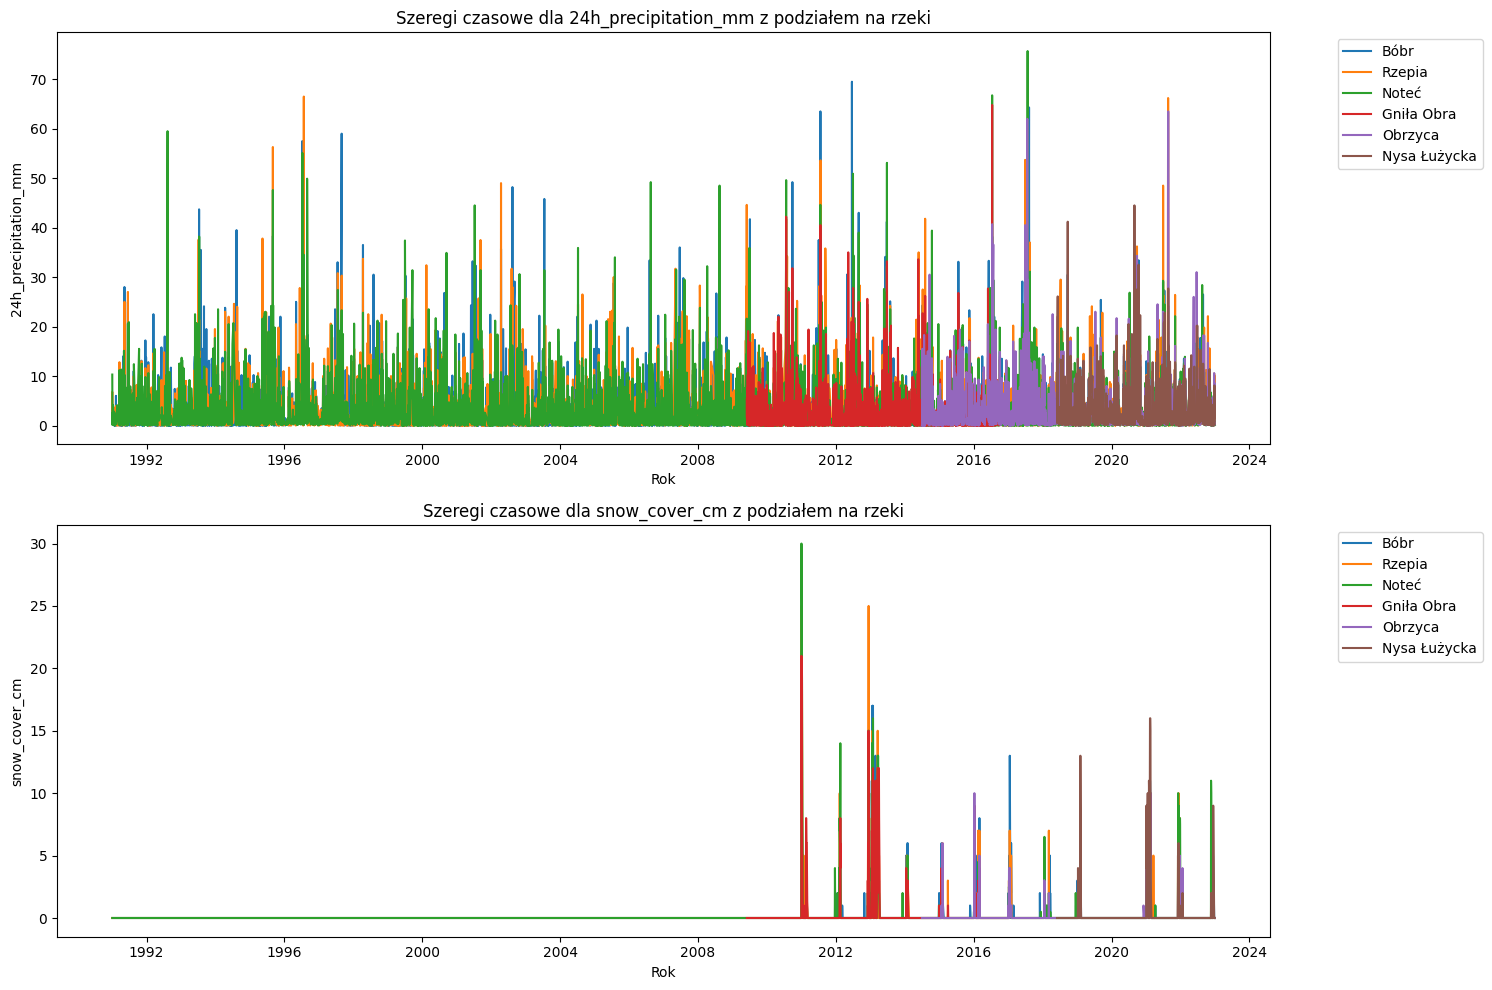

In [17]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10))
for i, column in enumerate(cols):
    sns.lineplot(data=df_t, x='date', y=column,  ax=ax[i], errorbar=None, hue='river')
    ax[i].set_title(f'Szeregi czasowe dla {column} z podziałem na rzeki')
    ax[i].set_ylabel(column)
    ax[i].set_xlabel('Rok')
    ax[i].legend(bbox_to_anchor=(1.05, 1), loc='upper left')


plt.tight_layout()
plt.show()

## Precip Type

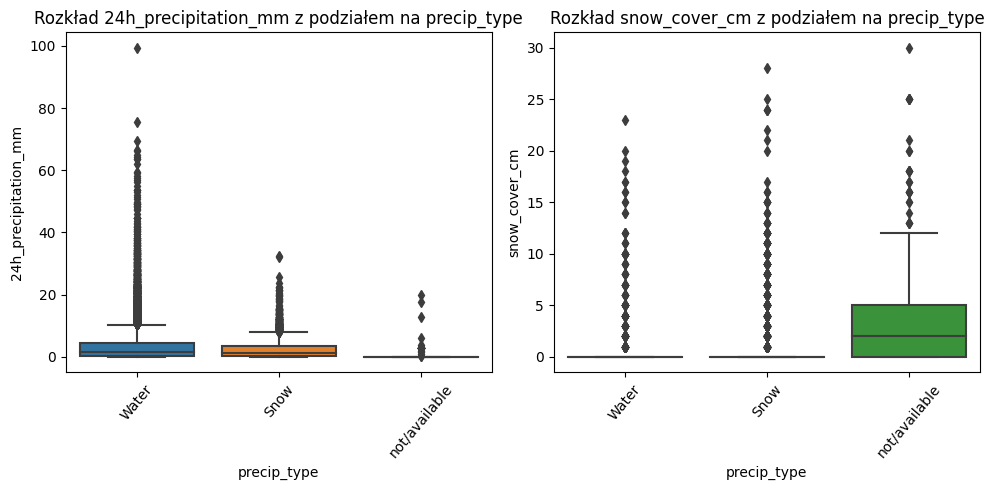

In [18]:
df_t['precip_type'].unique()
n_precip_type = len(df_t['precip_type'].unique())
x_ticks = [x for x in df_t["precip_type"].unique()]

fig, ax = plt.subplots(1, 2, figsize=(10,5))

for i, column in enumerate(cols):   
    sns.boxplot(data=df_t, y=column, x='precip_type', ax=ax[i])
    ax[i].set_title(f'Rozkład {column} z podziałem na precip_type')
    ax[i].set_xticklabels(x_ticks, rotation = 50)

plt.tight_layout()
plt.show()

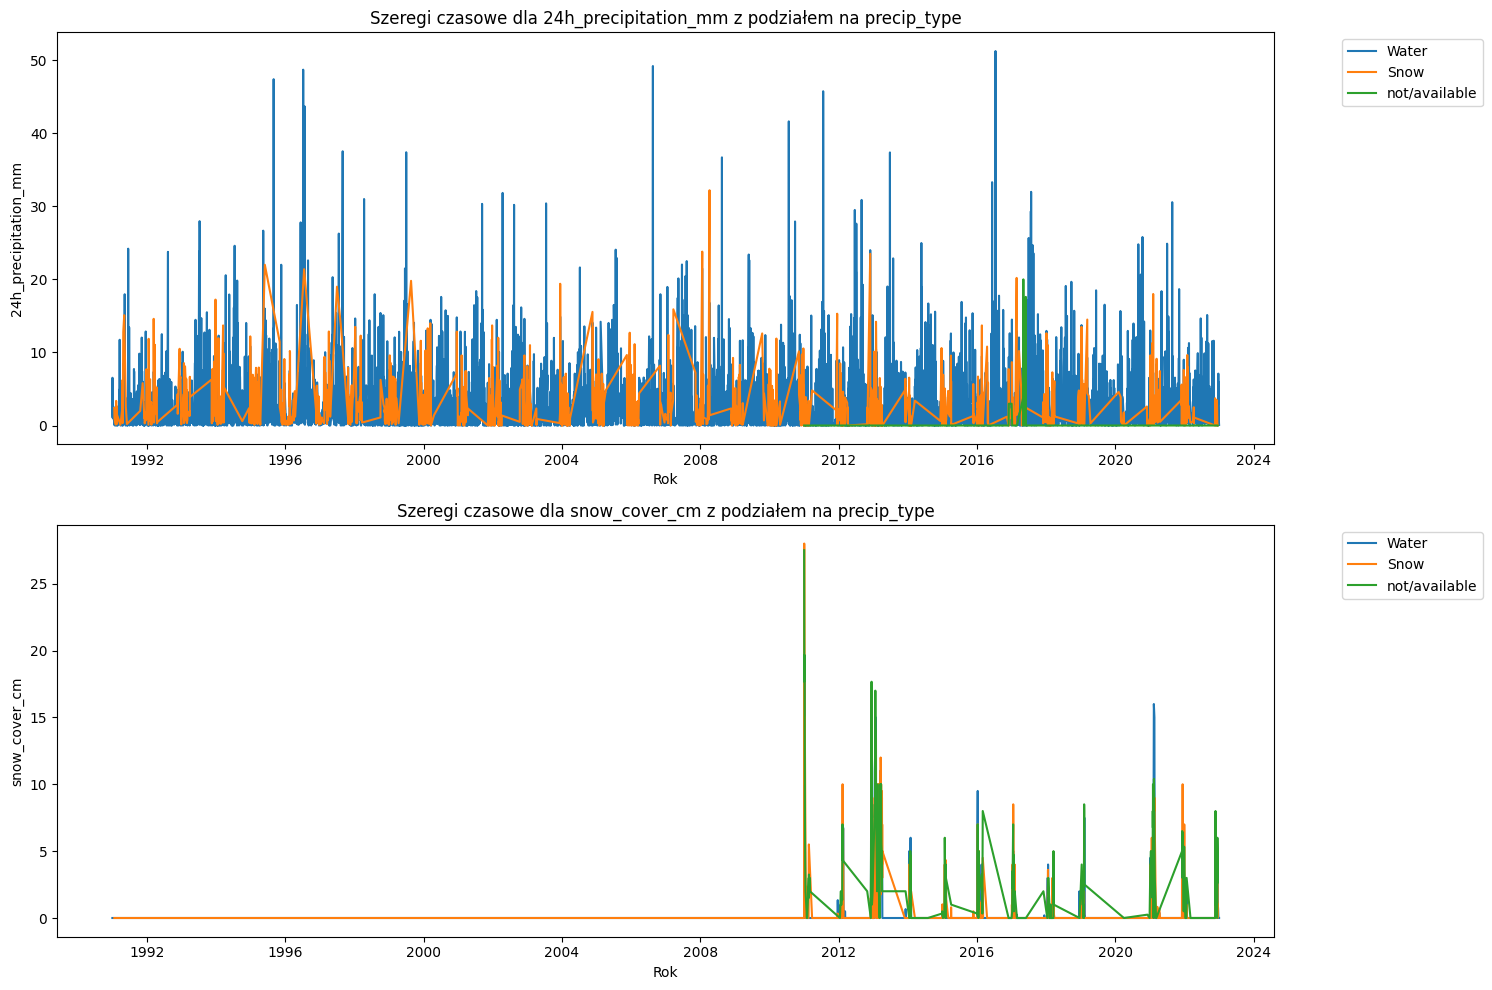

In [19]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10))
for i, column in enumerate(cols):
    sns.lineplot(data=df_t, x='date', y=column,  ax=ax[i], errorbar=None, hue='precip_type')
    ax[i].set_title(f'Szeregi czasowe dla {column} z podziałem na precip_type')
    ax[i].set_ylabel(column)
    ax[i].set_xlabel('Rok')
    ax[i].legend(bbox_to_anchor=(1.05, 1), loc='upper left')


plt.tight_layout()
plt.show()

## SMDB_status

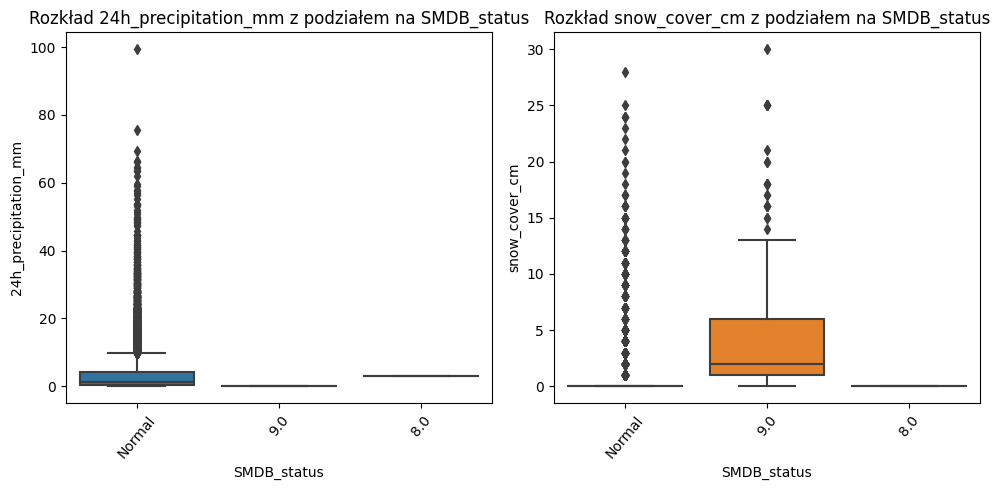

In [20]:
df_t['SMDB_status'].unique()
n_SMDB_status = len(df_t['SMDB_status'].unique())
x_ticks = [x for x in df_t["SMDB_status"].unique()]

fig, ax = plt.subplots(1, 2, figsize=(10,5))

for i, column in enumerate(cols):   
    sns.boxplot(data=df_t, y=column, x='SMDB_status', ax=ax[i])
    ax[i].set_title(f'Rozkład {column} z podziałem na SMDB_status')
    ax[i].set_xticklabels(x_ticks, rotation = 50)

plt.tight_layout()
plt.show()

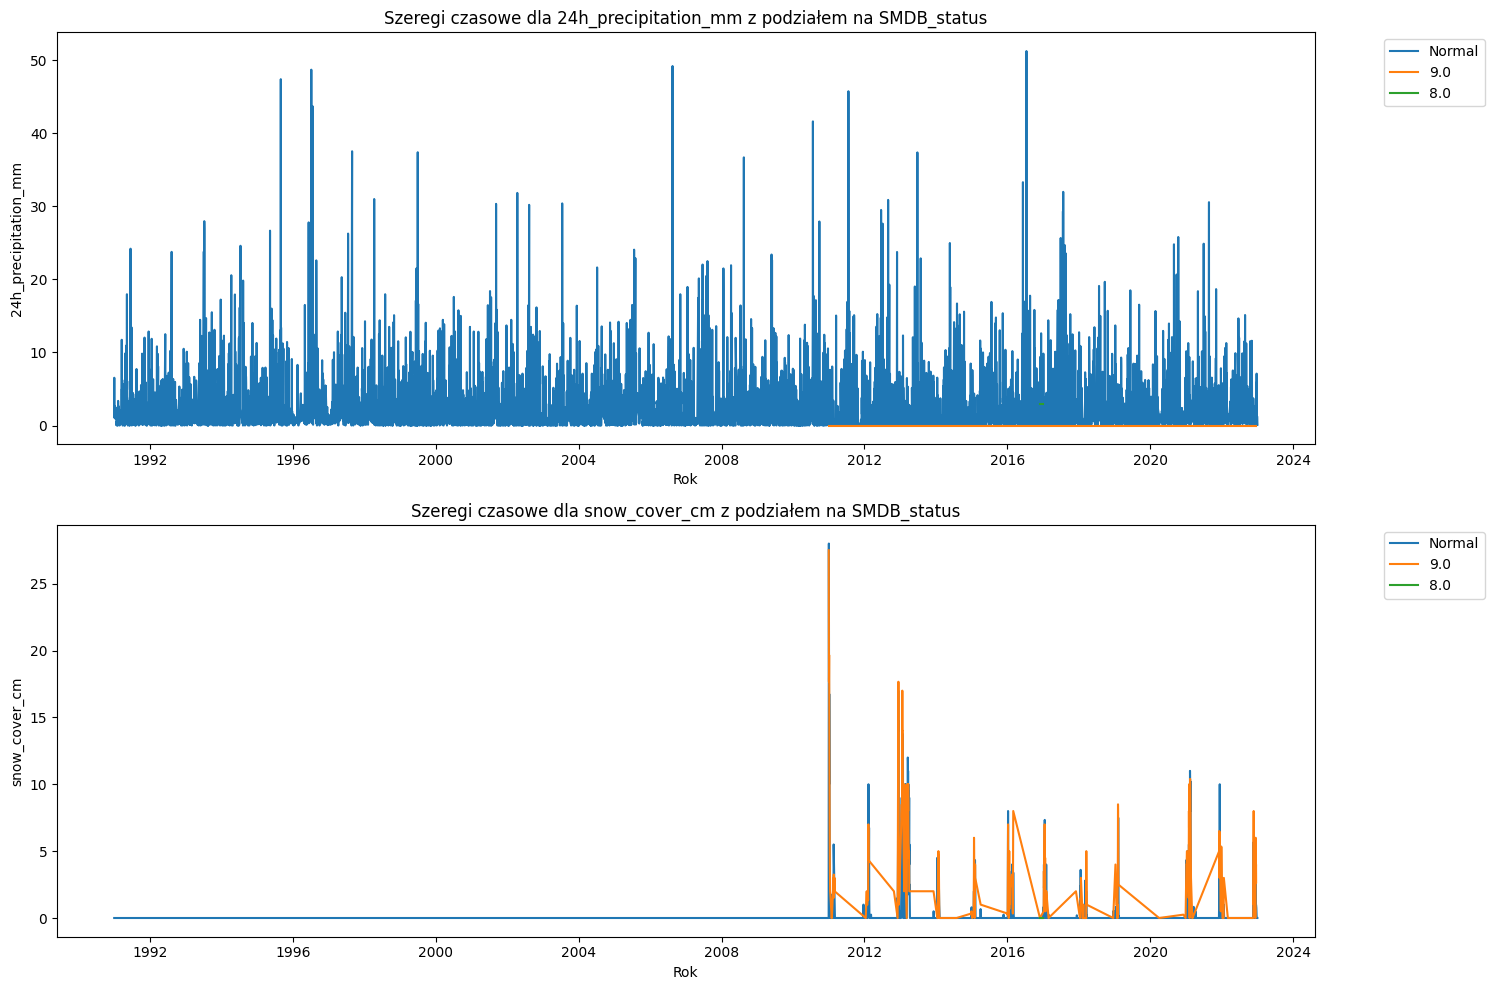

In [21]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10))
for i, column in enumerate(cols):
    sns.lineplot(data=df_t, x='date', y=column,  ax=ax[i], errorbar=None, hue='SMDB_status')
    ax[i].set_title(f'Szeregi czasowe dla {column} z podziałem na SMDB_status')
    ax[i].set_ylabel(column)
    ax[i].set_xlabel('Rok')
    ax[i].legend(bbox_to_anchor=(1.05, 1), loc='upper left')


plt.tight_layout()
plt.show()